In [1]:
import pandas as pd

In [2]:
# load pre-processed dataset
df = pd.read_csv('../../datasets/pre_processed_dataset.csv')
df.sample(3)

,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_apricot bao mushroom,item_name_basil,item_name_bell pepper,item_name_big broccoli,...,item_name_yuxingcao,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
731,0.406538,21.8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1554,0.217333,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9070,0.387000,31.6,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# define dependent and non dependent variables
y = df['quantity_sold_kg']
x = df.drop(columns=['quantity_sold_kg'], axis=1)

# split the dataset 0.7, 0.2, 0.1
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

"""use float32 data type for numerical values to reduce memory usage and improve performance"""

# convert to tensor arrays
x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)

x_train_tensor.shape, x_eval_tensor.shape, x_test.shape

2024-02-05 17:33:24.739162: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-02-05 17:33:24.739187: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-05 17:33:24.739193: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-05 17:33:24.739405: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-05 17:33:24.739799: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([10288, 155]), TensorShape([1286, 155]), (1286, 155))

In [5]:
# save testing dataset
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('../../datasets/testing_dataset.csv')
df_test.sample(3)

,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_apricot bao mushroom,item_name_basil,item_name_bell pepper,item_name_big broccoli,...,item_name_yuxingcao,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
249,0.465000,19.8,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
421,0.772875,8.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
813,0.757429,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
# convert to tensor arrays
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [9]:
from sklearn.metrics import mean_absolute_error

In [10]:
# Training set
train_pred = model.predict(x_train)
train_error = mean_absolute_error(y_train, train_pred)

# Testing set
test_pred = model.predict(x_test)
test_error = mean_absolute_error(y_test, test_pred)

print(f'Training Error: {train_error}')
print(f'Testing Error: {test_error}')

Training Error: 0.04320740355615276
Testing Error: 0.05029777666405695


In [11]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

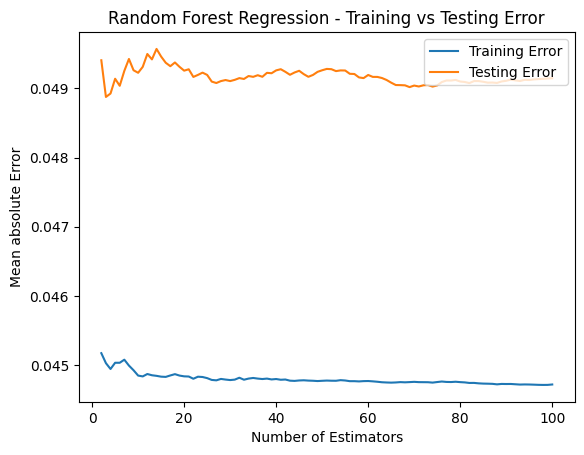

In [12]:
train_errors = []
test_errors = []

for i in range(2, 101):
    model = RandomForestRegressor(n_estimators=i, random_state=42)
    model.fit(x_train, y_train)
    
    # Training set
    train_pred = model.predict(x_train)
    train_error = mean_absolute_error(y_train, train_pred)
    train_errors.append(train_error)

    # Testing set
    test_pred = model.predict(x_test)
    test_error = mean_absolute_error(y_test, test_pred)
    test_errors.append(test_error)

# Plotting the results
plt.plot(range(2, 101), train_errors, label='Training Error')
plt.plot(range(2, 101), test_errors, label='Testing Error')
plt.title('Random Forest Regression - Training vs Testing Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean absolute Error')
plt.legend(loc='upper right')

In [13]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(x_train_tensor.shape[1], activation='tanh', input_shape=(x_train_tensor.shape[1],)))
model.add(tf.keras.layers.Reshape((1, x_train_tensor.shape[1]))) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Dense(64, activation='tanh'))
model.add(tf.keras.layers.Dense(32, activation='tanh'))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(4, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5), loss='mae', metrics=['mae'])

epoch_number = 150

# train model and get history
history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/150


2024-02-05 17:37:00.066474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 7s 18ms/step - loss: 0.4966 - mae: 0.4966 - val_loss: 0.4016 - val_mae: 0.4016
Epoch 2/150
322/322 [==============================] - 5s 16ms/step - loss: 0.3839 - mae: 0.3839 - val_loss: 0.3399 - val_mae: 0.3399
Epoch 3/150
322/322 [==============================] - 5s 16ms/step - loss: 0.3384 - mae: 0.3384 - val_loss: 0.3055 - val_mae: 0.3055
Epoch 4/150
322/322 [==============================] - 5s 15ms/step - loss: 0.3047 - mae: 0.3047 - val_loss: 0.2781 - val_mae: 0.2781
Epoch 5/150
322/322 [==============================] - 5s 15ms/step - loss: 0.2785 - mae: 0.2785 - val_loss: 0.2576 - val_mae: 0.2576
Epoch 6/150
322/322 [==============================] - 5s 15ms/step - loss: 0.2568 - mae: 0.2568 - val_loss: 0.2419 - val_mae: 0.2419
Epoch 7/150
322/322 [==============================] - 5s 15ms/step - loss: 0.2387 - mae: 0.2387 - val_loss: 0.2279 - val_mae: 0.2279
Epoch 8/150
322/322 [==============================] - 5s 15ms/step - loss

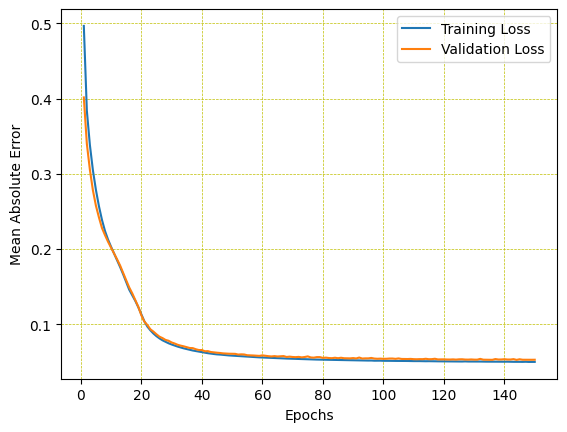

In [14]:
# plot loss with respect to epoch number
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(x_range, loss, label='Training Loss')
plt.plot(x_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [15]:
# final_model
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Dense(x_train_tensor.shape[1], activation='tanh', input_shape=(x_train_tensor.shape[1],)))
final_model.add(tf.keras.layers.Reshape((1, x_train_tensor.shape[1]))) 
final_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
final_model.add(tf.keras.layers.Dense(64, activation='tanh'))
final_model.add(tf.keras.layers.Dense(32, activation='tanh'))
final_model.add(tf.keras.layers.LSTM(16))
final_model.add(tf.keras.layers.Dense(4, activation='tanh'))
final_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile final_model
final_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5), loss='mae', metrics=['mae'])

epoch_number = 40

# train final_model and get history
history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/40
322/322 [==============================] - 7s 17ms/step - loss: 0.5127 - mae: 0.5127 - val_loss: 0.3719 - val_mae: 0.3719
Epoch 2/40
322/322 [==============================] - 5s 15ms/step - loss: 0.3626 - mae: 0.3626 - val_loss: 0.3232 - val_mae: 0.3232
Epoch 3/40
322/322 [==============================] - 5s 15ms/step - loss: 0.3195 - mae: 0.3195 - val_loss: 0.2860 - val_mae: 0.2860
Epoch 4/40
322/322 [==============================] - 5s 15ms/step - loss: 0.2821 - mae: 0.2821 - val_loss: 0.2562 - val_mae: 0.2562
Epoch 5/40
322/322 [==============================] - 5s 15ms/step - loss: 0.2509 - mae: 0.2509 - val_loss: 0.2348 - val_mae: 0.2348
Epoch 6/40
322/322 [==============================] - 5s 16ms/step - loss: 0.2270 - mae: 0.2270 - val_loss: 0.2196 - val_mae: 0.2196
Epoch 7/40
322/322 [==============================] - 5s 15ms/step - loss: 0.2083 - mae: 0.2083 - val_loss: 0.2060 - val_mae: 0.2060
Epoch 8/40
322/322 [==============================] - 5s 15ms/step - 

In [16]:
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 155)               24180     
                                                                 
 reshape_1 (Reshape)         (None, 1, 155)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            145408    
                                                                 
 dense_6 (Dense)             (None, 1, 64)             8256      
                                                                 
 dense_7 (Dense)             (None, 1, 32)             2080      
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense_8 (Dense)             (None, 4)                

In [17]:
# view loss for testing values
final_model.evaluate(x_test_tensor, y_test_tensor)

41/41 [==============================] - 0s 8ms/step - loss: 0.0601 - mae: 0.0601


[0.06012817844748497, 0.06012817844748497]

In [18]:
# predict sample value set
y_predictions = final_model.predict(x_test_tensor)
y_predictions[:5]

41/41 [==============================] - 1s 7ms/step


array([[0.9670533],
       [0.4378879],
       [0.9972371],
       [0.5041924],
       [0.2154023]], dtype=float32)

In [19]:
# view actual values
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1.    , 0.4258, 1.    , 0.666 , 0.003 ], dtype=float32)>

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mean_squared_error(y_test_tensor, y_predictions)

0.013129625

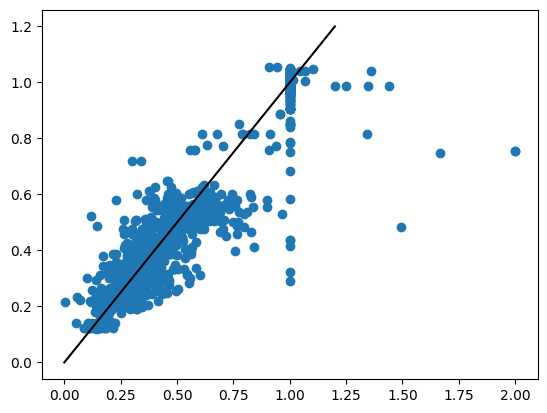

In [22]:
x = [0 , 1.2]
y = x

plt.scatter(y_test_tensor, y_predictions)
plt.plot(x, y, color='black')

In [23]:
# save final model
final_model.save('sales_prediction_model')

INFO:tensorflow:Assets written to: sales_prediction_model/assets


INFO:tensorflow:Assets written to: sales_prediction_model/assets
